# Teste UBISGD

In [20]:
from implicit_data import ImplicitData
#from param_tuning import PatternSearchISGD
from pprint import pprint
import pandas as pd
from operator import itemgetter
import numpy as np
from UBISGD import UBISGD
from EvalPrequential import EvalPrequential
from datetime import datetime
import sys
import csv
sys.path.append('./')
configPath = 'config'
dataPath = 'ml1m_gte5.csv'


Data = []
data = pd.read_csv("ml1m_gte5.csv","\t")
print(data)
Data = data.values.tolist()


Data_Transpose = np.transpose(Data)
stream = ImplicitData(Data_Transpose[0],Data_Transpose[1])

num_factors = 160
num_iterations = 8
learn_rate = 0.1
u_regularization = 0.4
i_regularization = 0.4
random_seed = 10
num_nodes = 16

model = UBISGD(ImplicitData([],[]),num_factors, num_iterations,num_nodes,learn_rate,u_regularization,i_regularization,random_seed)


eval = EvalPrequential(model,stream, metrics = ["Recall@20"])




        UserID  ItemID   Timestamp
0         6040     593   956703954
1         6040    2019   956703977
2         6040     213   956704056
3         6040    3111   956704056
4         6040     912   956704191
...        ...     ...         ...
226305    5950    3363  1046367948
226306    5950     111  1046368241
226307    5950    3196  1046368462
226308    5948    1180  1046437879
226309    4958    1407  1046454443

[226310 rows x 3 columns]


In [21]:
%%capture out

start_recommend = datetime.now()
print('start time', start_recommend)

results=eval.EvaluateTime(0,stream.size, 50)

print('npmean(resuls[Recall@20])', np.mean(results['Recall@20']))
end_recommend = datetime.now()
print('end time', end_recommend)

tempo = end_recommend - start_recommend

print('run time', tempo)
print('')
print('get tuple',np.mean(results['time_get_tuple']))
print('recommend',np.mean(results['time_recommend']))
print('eval_point',np.mean(results['time_eval_point']))
print('update',np.mean(results['time_update']))

In [22]:
print(out)

start time 2023-11-17 07:14:23.095707
npmean(resuls[Recall@20]) 0.08311800172265288
end time 2023-11-17 07:26:54.530472
run time 0:12:31.434765

get tuple 2.8045909329218373e-06
recommend 0.06787630892539209
eval_point 6.611269163120215e-05
update 0.0019201971112820554



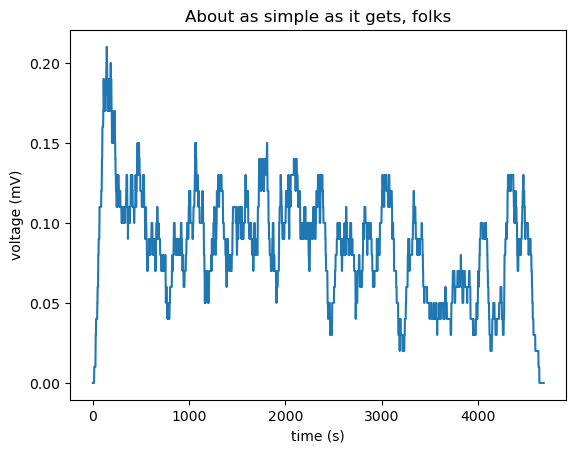

In [19]:
import matplotlib.pyplot as plt
x = np.convolve(results['Recall@20'],np.ones(100))/100
t = np.arange(0, len(x))

fig, ax = plt.subplots()
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.plot(t, x)
plt.show()

## import

In [1]:
from implicit_data import ImplicitData
#from param_tuning import PatternSearchISGD
from pprint import pprint
import pandas as pd
from operator import itemgetter
import numpy as np
from UBISGD import UBISGD
from EvalPrequential import EvalPrequential
from datetime import datetime
import sys
import csv

### ml1m_sample5_1

In [7]:
sys.path.append('./')
configPath = 'config'

Data = []
data = pd.read_csv("ml1m_sample5_1.csv")
print(data)
Data = data.values.tolist()

Data = Data[1:]
 

       Unnamed: 0  UserID  ItemID   Timestamp
0             365    6029     899   956721639
1             366    6029    3548   956721700
2             367    6029    3545   956721732
3             368    6029    3543   956721759
4             369    6029    3549   956721780
...           ...     ...     ...         ...
11252      225903     937    2300  1042909231
11253      225935     195    3746  1043562457
11254      226240    4312     750  1045841700
11255      226241    4312    1267  1045841716
11256      226267     911    2409  1046066544

[11257 rows x 4 columns]


In [8]:
Data_Transpose = np.transpose(Data)
stream = ImplicitData(Data_Transpose[1],Data_Transpose[2])

num_factors = 160
num_iterations = 8
learn_rate = 0.1
u_regularization = 0.4
i_regularization = 0.4
random_seed = 100
num_nodes = 8

model = UBISGD(ImplicitData([],[]),num_factors, num_iterations,num_nodes,learn_rate,u_regularization,i_regularization,random_seed)


eval = EvalPrequential(model,stream, metrics = ["Recall@20"])
start_recommend = datetime.now()
print('start time', start_recommend)

results=eval.EvaluateTime(0,stream.size, 100)

print('npmean(resuls[Recall@20])', np.mean(results['Recall@20']))
end_recommend = datetime.now()
print('end time', end_recommend)

tempo = end_recommend - start_recommend

print('run time', tempo)
print('')
print('get tuple',np.mean(results['time_get_tuple']))
print('recommend',np.mean(results['time_recommend']))
print('eval_point',np.mean(results['time_eval_point']))
print('update',np.mean(results['time_update']))

start time 2022-09-20 18:47:00.716304
npmean(resuls[Recall@20]) 0.08247422680412371
end time 2022-09-20 18:47:20.237660
run time 0:00:19.521356

get tuple 2.506699389231993e-06
recommend 0.020790294273612425
eval_point 1.615101529150894e-05
update 0.001549789773375749


### ml1m_sample5_2

In [9]:
sys.path.append('./')
configPath = 'config'

Data = []
data = pd.read_csv("ml1m_sample5_2.csv")
print(data)
Data = data.values.tolist()

Data = Data[1:]

       Unnamed: 0  UserID  ItemID   Timestamp
0             206    6033    1193   956713500
1             207    6033    1214   956713838
2             208    6033    2028   956713838
3             209    6033     110   956713865
4             210    6033    1036   956713898
...           ...     ...     ...         ...
11037      226258    5329    1212  1045895993
11038      226259    5329    2692  1045896006
11039      226260    5329     942  1045896053
11040      226261    5329    2019  1045896053
11041      226262    5329    3035  1045896063

[11042 rows x 4 columns]


In [10]:
Data_Transpose = np.transpose(Data)
stream = ImplicitData(Data_Transpose[1],Data_Transpose[2])

num_factors = 160
num_iterations = 8
learn_rate = 0.1
u_regularization = 0.4
i_regularization = 0.4
random_seed = 100
num_nodes = 8

model = UBISGD(ImplicitData([],[]),num_factors, num_iterations,num_nodes,learn_rate,u_regularization,i_regularization,random_seed)


eval = EvalPrequential(model,stream, metrics = ["Recall@20"])
start_recommend = datetime.now()
print('start time', start_recommend)

results=eval.EvaluateTime(0,stream.size, 100)

print('npmean(resuls[Recall@20])', np.mean(results['Recall@20']))
end_recommend = datetime.now()
print('end time', end_recommend)

tempo = end_recommend - start_recommend

print('run time', tempo)
print('')
print('get tuple',np.mean(results['time_get_tuple']))
print('recommend',np.mean(results['time_recommend']))
print('eval_point',np.mean(results['time_eval_point']))
print('update',np.mean(results['time_update']))

start time 2022-09-20 18:47:20.666017
npmean(resuls[Recall@20]) 0.09322033898305085
end time 2022-09-20 18:47:39.385265
run time 0:00:18.719248

get tuple 2.2774685898635625e-06
recommend 0.01988729986093812
eval_point 1.6929739612644e-05
update 0.0014778295188221785


### ml1m_sample5_3

In [11]:
sys.path.append('./')
configPath = 'config'

Data = []
data = pd.read_csv("ml1m_sample5_3.csv")
print(data)
Data = data.values.tolist()

Data = Data[1:]

       Unnamed: 0  UserID  ItemID   Timestamp
0             110    6035    1193   956710879
1             120    6035    2628   956711024
2             123    6035    3175   956711064
3             124    6035    2571   956711064
4             129    6035    1527   956711121
...           ...     ...     ...         ...
11544      226173    5654    1500  1045160087
11545      226174    5654      39  1045160173
11546      226175    5654    3358  1045160206
11547      226176    5654    3526  1045162240
11548      226203    5654    2022  1045669508

[11549 rows x 4 columns]


In [12]:
Data_Transpose = np.transpose(Data)
stream = ImplicitData(Data_Transpose[1],Data_Transpose[2])

num_factors = 160
num_iterations = 8
learn_rate = 0.1
u_regularization = 0.4
i_regularization = 0.4
random_seed = 100
num_nodes = 8

model = UBISGD(ImplicitData([],[]),num_factors, num_iterations,num_nodes,learn_rate,u_regularization,i_regularization,random_seed)


eval = EvalPrequential(model,stream, metrics = ["Recall@20"])
start_recommend = datetime.now()
print('start time', start_recommend)

results=eval.EvaluateTime(0,stream.size, 100)

print('npmean(resuls[Recall@20])', np.mean(results['Recall@20']))
end_recommend = datetime.now()
print('end time', end_recommend)

tempo = end_recommend - start_recommend

print('run time', tempo)
print('')
print('get tuple',np.mean(results['time_get_tuple']))
print('recommend',np.mean(results['time_recommend']))
print('eval_point',np.mean(results['time_eval_point']))
print('update',np.mean(results['time_update']))

start time 2022-09-20 18:47:40.112117
npmean(resuls[Recall@20]) 0.037383177570093455
end time 2022-09-20 18:47:59.532794
run time 0:00:19.420677

get tuple 2.2818028906203487e-06
recommend 0.01930007756313431
eval_point 1.7114888841860762e-05
update 0.0014978808476349289


### ml1m_sample5_4

In [13]:
sys.path.append('./')
configPath = 'config'

Data = []
data = pd.read_csv("ml1m_sample5_4.csv")
print(data)
Data = data.values.tolist()

Data = Data[1:]

       Unnamed: 0  UserID  ItemID   Timestamp
0              42    6038    1079   956707547
1              43    6038    1148   956707604
2              44    6038    3088   956707640
3              45    6038    1223   956707734
4             206    6033    1193   956713500
...           ...     ...     ...         ...
11461      226168    4958    2087  1045000073
11462      226242     839     909  1045857499
11463      226243     839     750  1045857818
11464      226244     839     954  1045859395
11465      226310    4958    1407  1046454443

[11466 rows x 4 columns]


In [14]:
Data_Transpose = np.transpose(Data)
stream = ImplicitData(Data_Transpose[1],Data_Transpose[2])

num_factors = 160
num_iterations = 8
learn_rate = 0.1
u_regularization = 0.4
i_regularization = 0.4
random_seed = 100
num_nodes = 8

model = UBISGD(ImplicitData([],[]),num_factors, num_iterations,num_nodes,learn_rate,u_regularization,i_regularization,random_seed)


eval = EvalPrequential(model,stream, metrics = ["Recall@20"])
start_recommend = datetime.now()
print('start time', start_recommend)

results=eval.EvaluateTime(0,stream.size, 100)

print('npmean(resuls[Recall@20])', np.mean(results['Recall@20']))
end_recommend = datetime.now()
print('end time', end_recommend)

tempo = end_recommend - start_recommend

print('run time', tempo)
print('')
print('get tuple',np.mean(results['time_get_tuple']))
print('recommend',np.mean(results['time_recommend']))
print('eval_point',np.mean(results['time_eval_point']))
print('update',np.mean(results['time_update']))

start time 2022-09-20 18:48:11.521198
npmean(resuls[Recall@20]) 0.059322033898305086
end time 2022-09-20 18:48:30.509173
run time 0:00:18.987975

get tuple 2.3179734267889024e-06
recommend 0.01960587501525879
eval_point 1.7139871241682666e-05
update 0.001449237200457926


### ml1m_sample5_5

In [15]:
sys.path.append('./')
configPath = 'config'

Data = []
data = pd.read_csv("ml1m_sample5_5.csv")
print(data)
Data = data.values.tolist()

Data = Data[1:]

       Unnamed: 0  UserID  ItemID   Timestamp
0               1    6040     593   956703954
1               2    6040    2019   956703977
2               3    6040     213   956704056
3               4    6040    3111   956704056
4               5    6040     912   956704191
...           ...     ...     ...         ...
11050      226029     424    1935  1043844911
11051      226054     424    1939  1044296801
11052      226201     424    3739  1045581875
11053      226239     424    2494  1045837566
11054      226279     424    3535  1046112575

[11055 rows x 4 columns]


In [16]:
Data_Transpose = np.transpose(Data)
stream = ImplicitData(Data_Transpose[1],Data_Transpose[2])

num_factors = 160
num_iterations = 8
learn_rate = 0.1
u_regularization = 0.4
i_regularization = 0.4
random_seed = 100
num_nodes = 8

model = UBISGD(ImplicitData([],[]),num_factors, num_iterations,num_nodes,learn_rate,u_regularization,i_regularization,random_seed)


eval = EvalPrequential(model,stream, metrics = ["Recall@20"])
start_recommend = datetime.now()
print('start time', start_recommend)

results=eval.EvaluateTime(0,stream.size, 100)

print('npmean(resuls[Recall@20])', np.mean(results['Recall@20']))
end_recommend = datetime.now()
print('end time', end_recommend)

tempo = end_recommend - start_recommend

print('run time', tempo)
print('')
print('get tuple',np.mean(results['time_get_tuple']))
print('recommend',np.mean(results['time_recommend']))
print('eval_point',np.mean(results['time_eval_point']))
print('update',np.mean(results['time_update']))

start time 2022-09-20 18:48:41.356182
npmean(resuls[Recall@20]) 0.08771929824561403
end time 2022-09-20 18:48:59.842449
run time 0:00:18.486267

get tuple 2.207280671982604e-06
recommend 0.018899796301858465
eval_point 1.663283297890111e-05
update 0.001472546757939109
